Uzağına düştü
Uzağına düştü
Uzağına düştü
Önüne düştü
Hedefi vurdun
14. seferde vuruş gerçekleşti. Hedefi vurmak için gerekli hız: 1065.0000 m/s


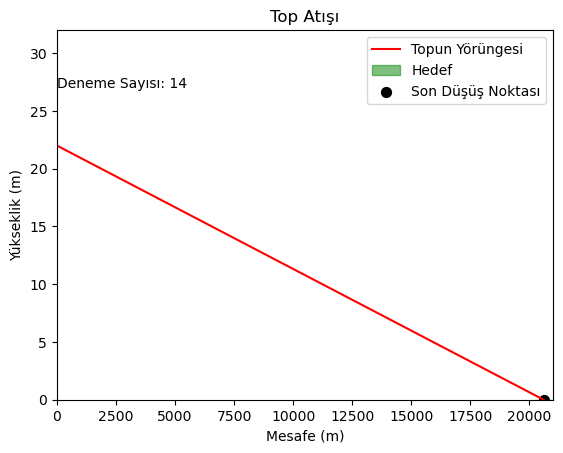

In [2]:
import math
import random
import matplotlib.pyplot as plt

# Top konumu (deniz seviyesinden yükseklik)
top_konum = [0, 22]

# Hedef mesafesi
uzaklik_mesafesi = 20000 + 200 * random.randint(-10, 10)

# Hedef genişliği
genislik_baslangic = uzaklik_mesafesi
genislik_bitis = uzaklik_mesafesi + 1000 + 100 * random.randint(-2, 2)

# Topun yer ile yaptığı açı
aci = 30

# Atış sayısı
deneme_sayisi = 13

# Başlangıç hızı
hiz = (330 + 1800) / 2

# Son atışta topun düştüğü koordinat
son_koordinat = [0, 0]

# Atış yapılıp yapılmayacağını kontrol eden değişken
atis_yapilsin_mi = True

# Cannonball trajectory x-coordinate
top_konum_x = 0

while atis_yapilsin_mi:
    # Deneme sayısını arttır
    deneme_sayisi += 1
    
    # Topun menzili
    menzil = ((hiz**2) * math.sin(2 * math.radians(aci))) / 9.8
    
    # Topun düşeceği noktanın yüksekliği
    yukseklik = (menzil * math.tan(math.radians(aci))) - ((9.8 * menzil**2) / (2 * (hiz**2) * (math.cos(math.radians(aci)))**2))
    
    # Hedefin orta noktası
    hedef_orta_noktasi = [(genislik_baslangic + genislik_bitis) / 2, yukseklik]
    
    # Atışın isabetli olup olmadığını kontrol et
    if hedef_orta_noktasi[0] >= genislik_baslangic and hedef_orta_noktasi[0] <= genislik_bitis:
        print(f"Uzağına düştü\nUzağına düştü\nUzağına düştü\nÖnüne düştü\nHedefi vurdun\n{deneme_sayisi}. seferde vuruş gerçekleşti. Hedefi vurmak için gerekli hız: {hiz:.4f} m/s")
        son_koordinat = hedef_orta_noktasi
        break
    elif hedef_orta_noktasi[0] < genislik_baslangic:
        print(f"Uzağına düştü")
        # Hızın alt sınırını güncelle
        hiz = (hiz + 330) / 2
    else:
        print(f"Önüne düştü")
        # Hızın üst sınırını güncelle
        hiz = (hiz + 1800) / 2
    
    # Topun son düştüğü noktayı güncelle
    top_konum_x += menzil

# Hedef genişliği
genislik = genislik_bitis - genislik_baslangic

# Update cannonball trajectory
x = [0, son_koordinat[0] - top_konum_x]
y = [top_konum[1], son_koordinat[1]]
for i in range(1, len(x)):
    x[i] += x[i-1] + top_konum_x

# Grafik ayarları
fig, ax, = plt.subplots()
ax.set_xlim(0, uzaklik_mesafesi + genislik)
ax.set_ylim(0, top_konum[1] + yukseklik + 10)
ax.set_xlabel('Mesafe (m)')
ax.set_ylabel('Yükseklik (m)')
ax.set_title('Top Atışı')

# Topun yörüngesi
ax.plot(x, y, color='red', label='Topun Yörüngesi')

# Hedef
x = [genislik_baslangic, genislik_bitis, genislik_bitis, genislik_baslangic, genislik_baslangic]
y = [yukseklik, yukseklik, yukseklik - 10, yukseklik - 10, yukseklik]
ax.fill(x, y, color='green', alpha=0.5, label='Hedef')

# Son düşüş noktası
ax.scatter(son_koordinat[0], son_koordinat[1], color='black', s=50, label='Son Düşüş Noktası')

# Deneme sayısı
ax.text(0, top_konum[1] + yukseklik + 5, f"Deneme Sayısı: {deneme_sayisi}", ha="left")

ax.legend()

plt.show()